# Import Libraries

In [33]:
# Importing libraries
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Dataframe

In [35]:
# Import datframe 'aggregated_ords_prods_merge.pkl' 
path= r'C:\users\Ali Hassan\Documents\MM-2020 Instacart Basket Analysis'
ords_prods_merge= pd.read_pickle(os.path.join(path, 'Data', 'Prepared data' ,'aggregated_ords_prods_merge.pkl'))

# Create Visualization

# 1. Bar chart.

<Axes: xlabel='orders_day_of_week'>

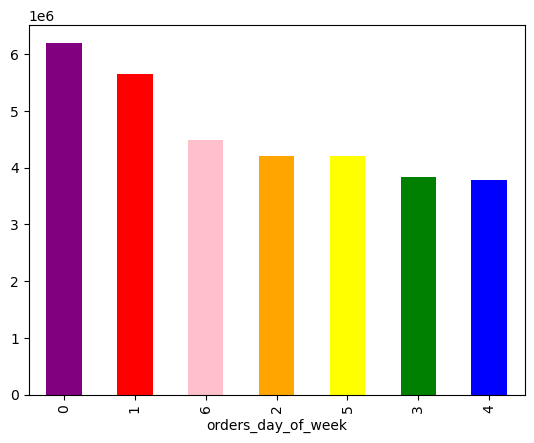

In [39]:
# Create bar chart.
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color= ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

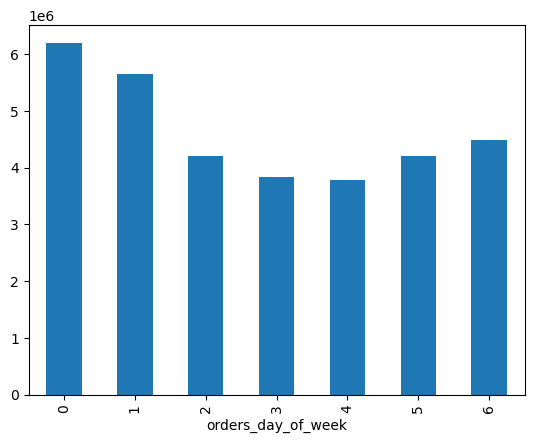

In [37]:
bar= ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [38]:
# Exporting Bar chart.
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'bar_orders_dow.png'))

# 2. Histogram.

<Axes: ylabel='Frequency'>

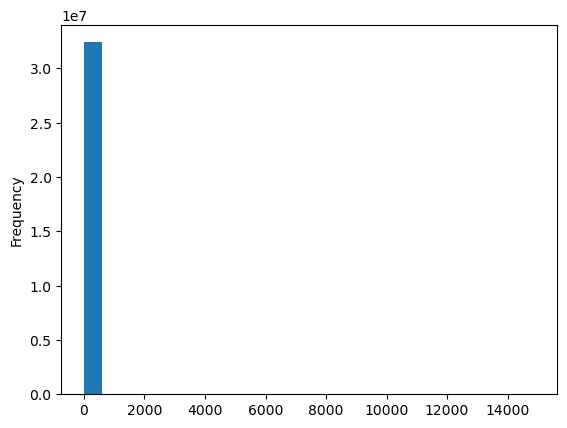

In [44]:
# Create Histogram.
ords_prods_merge['prices'].plot.hist(bins=25)

# 3. Scatterplot.

<Axes: xlabel='prices', ylabel='prices'>

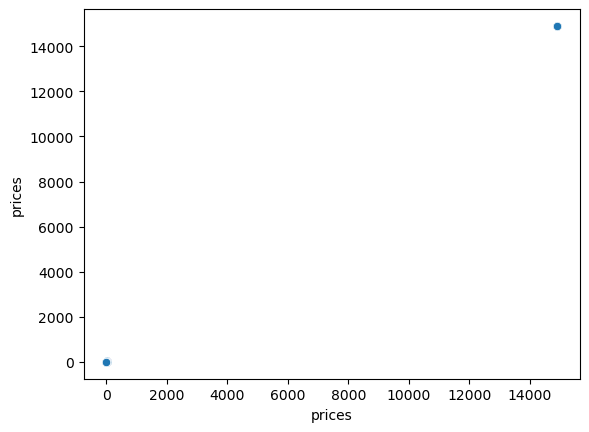

In [46]:
# Create Scatterplot.
sns.scatterplot(x= 'prices', y= 'prices',data = ords_prods_merge)

In [48]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,...,Busiest day,Busiest_day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag
order_id,,,,,,,,,,,,,,,,,,,,,
912404,17,12,2,14,5.0,21553,5,0,both,Lowfat 2% Milkfat Cottage Cheese,...,Regular busy,Regular busy,Regularly busy,Most orders,40,Regular customer,14900.0,High_spender,5.0,Frequent Customer
603376,17,22,6,16,4.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,...,Regular busy,Regular busy,Regularly busy,Most orders,40,Regular customer,14900.0,High_spender,5.0,Frequent Customer
3264360,135,2,2,21,13.0,21553,6,0,both,Lowfat 2% Milkfat Cottage Cheese,...,Regular busy,Regular busy,Regularly busy,Average orders,4,New customer,14900.0,High_spender,12.0,Regular_customer
892534,135,3,0,8,12.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,...,Busiest day,Busiest day,Busiest days,Average orders,4,New customer,14900.0,High_spender,12.0,Regular_customer
229704,342,8,1,19,30.0,21553,9,0,both,Lowfat 2% Milkfat Cottage Cheese,...,Regular busy,Regular busy,Busiest days,Average orders,16,Regular customer,14900.0,High_spender,23.0,Non_frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3172853,205650,18,1,9,7.0,21553,17,1,both,Lowfat 2% Milkfat Cottage Cheese,...,Regular busy,Regular busy,Busiest days,Most orders,25,Regular customer,14900.0,High_spender,6.0,Frequent Customer
2504315,205818,3,5,15,3.0,21553,13,0,both,Lowfat 2% Milkfat Cottage Cheese,...,Regular busy,Regular busy,Regularly busy,Most orders,25,Regular customer,14900.0,High_spender,13.0,Regular_customer
1108388,205818,5,4,5,1.0,21553,5,1,both,Lowfat 2% Milkfat Cottage Cheese,...,Least busy,Least busy,Slowest days,Fewest orders,25,Regular customer,14900.0,High_spender,13.0,Regular_customer


In [50]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices']= np.nan

In [52]:
ords_prods_merge['prices'].max()

25.0

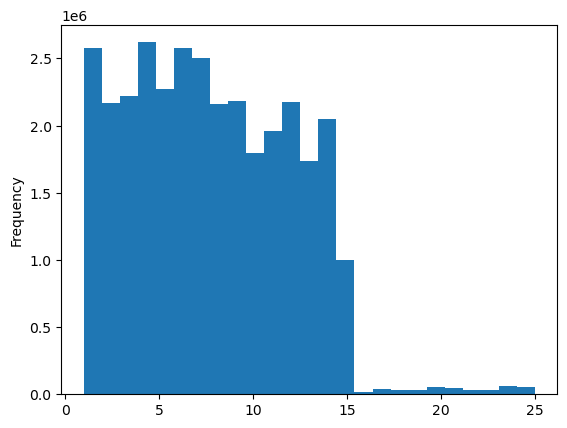

In [54]:
hist= ords_prods_merge['prices'].plot.hist(bins = 25)

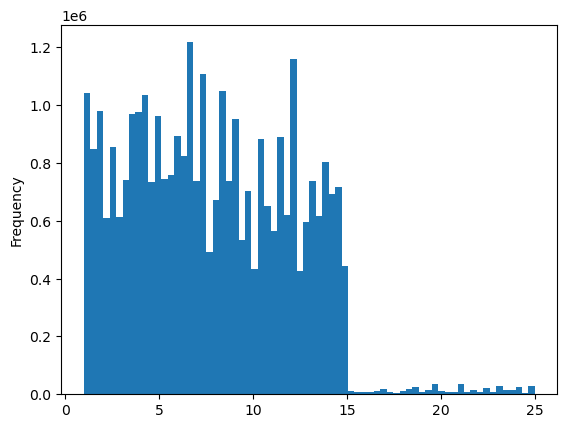

In [56]:
hist_2= ords_prods_merge['prices'].plot.hist(bins = 70)

In [62]:
hist_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualization', 'hist_2_orders_dow.png'))

# Sampling Data

In [66]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [68]:
dev

array([False,  True, False, ...,  True,  True, False])

In [70]:
np.random.rand(10)

array([0.15311818, 0.81786511, 0.20691209, 0.46877994, 0.64491806,
       0.17090853, 0.00833434, 0.18474633, 0.63848856, 0.5795878 ])

In [72]:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [74]:
# Create a list holding True/False values to test the np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [76]:
# Store 70% of the sample in dataframe big.
big = ords_prods_merge[dev]

In [78]:
# Store 30% of the sampe in dataframe small.
small = ords_prods_merge[~dev]

In [80]:
len(ords_prods_merge)

32404161

In [82]:
len(big) + len(small)

32404161

In [84]:
df_2 = small[['orders_day_of_week', 'prices']]